In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score, normalized_mutual_info_score, davies_bouldin_score

# A2, Task 3
---------

In [44]:
def cluster(data, method):

    df = pd.DataFrame(data=np.zeros((4, 4)), columns=['K', 'SI', 'DB', 'NMI']).set_index('K')
    df.index = range(2, 6)
    fig, ax = plt.subplots(4, 1, figsize=(7, 7));
    features = data[['X', 'Y']].values
    labels = data['class'].values

    for K in range(2, 6):
        
        if method == 'kmeans':
            clustering = KMeans(n_clusters=K).fit(features)
        if method == 'spectral':
            clustering = SpectralClustering(n_clusters=K, affinity='rbf').fit(features)
        pred = clustering.labels_

        SI = silhouette_score(features, pred)
        df.at[K, 'SI'] = np.round(SI, 2)

        DB = davies_bouldin_score(features, pred)
        df.at[K, 'DB'] = np.round(DB, 2)

        NMI = normalized_mutual_info_score(labels, pred)
        df.at[K, 'NMI'] = np.round(NMI, 2)

        ax[K-2].scatter(data['X'], data['Y'], c=pred)
        ax[K-2].set_title("K={}".format(K))

    fig.tight_layout()
    
    return df

## a)

In [45]:
balls = pd.read_csv('balls.txt', sep=',')
balls

,X,Y,class
0,-6.244,6.6637,0
1,-8.194,7.5372,0
2,1.732,-0.6362,2
3,-6.137,-5.1643,1
4,-7.424,6.4897,0
...,...,...,...
394,-9.010,6.6230,0
395,-9.035,7.0882,0
396,4.128,-0.2192,2
397,2.770,0.0012,2


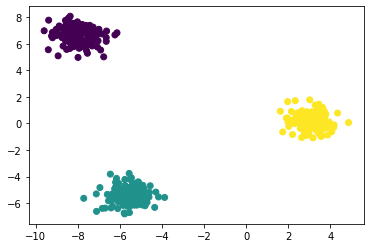

In [46]:
plt.scatter(balls['X'], balls['Y'], c=balls['class'])

### i) K-means

,SI,DB,NMI
2,0.67,0.52,0.73
3,0.90,0.14,1.00
4,0.71,0.65,0.91
5,0.52,0.95,0.83


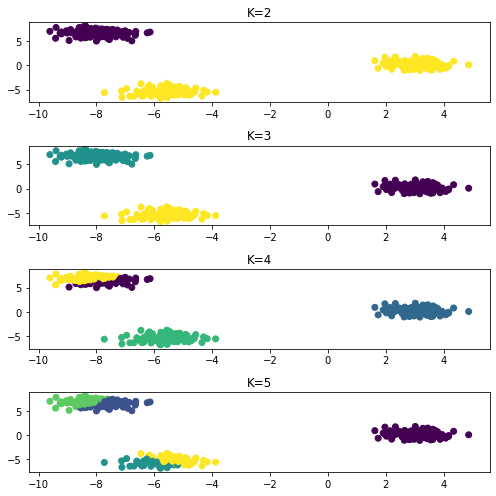

In [47]:
cluster(balls, 'kmeans')

### ii)

,SI,DB,NMI
2,0.67,0.52,0.73
3,0.90,0.14,1.00
4,0.71,0.65,0.91
5,0.52,0.96,0.83


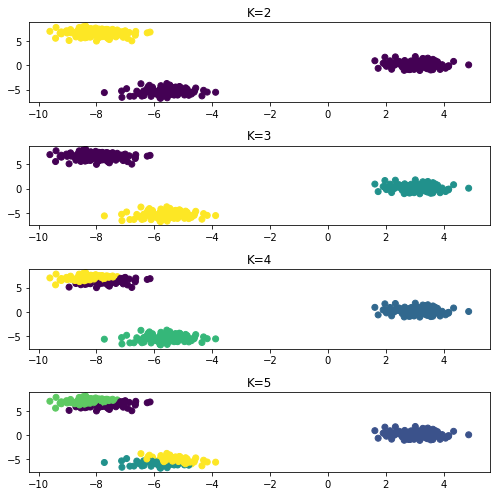

In [48]:
cluster(balls, 'spectral')

## b)

In [49]:
spirals = pd.read_csv('spirals.txt', sep=',')
spirals

,X,Y,class
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
...,...,...,...
307,15.75,13.85,2
308,15.65,14.05,2
309,15.65,14.25,2
310,15.65,14.50,2


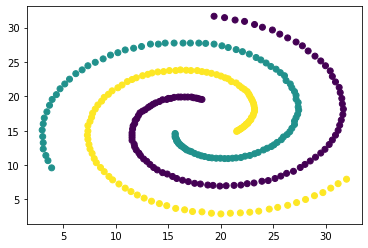

In [50]:
plt.scatter(spirals['X'], spirals['Y'], c=spirals['class'])

### i) K-means

,SI,DB,NMI
2,0.35,1.17,0.00
3,0.36,0.88,0.00
4,0.35,0.88,0.00
5,0.35,0.90,0.01


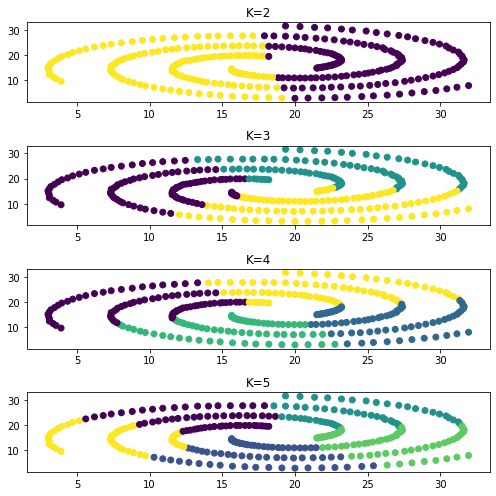

In [51]:
cluster(spirals, 'kmeans')

## ii)

,SI,DB,NMI
2,0.03,6.31,0.73
3,0.00,5.88,1.00
4,-0.01,6.91,0.91
5,0.02,5.46,0.83


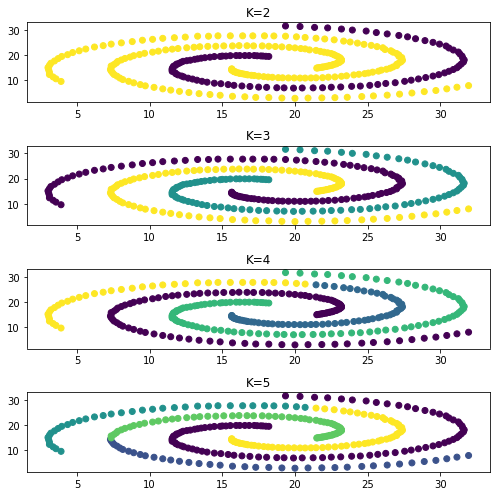

In [52]:
cluster(spirals, 'spectral')